In [1]:
# vigilant:6006/

In [2]:
%env

{'ACLOCAL_PATH': 'C:\\dev\\git\\mingw64\\share\\aclocal;C:\\dev\\git\\usr\\share\\aclocal',
 'AIRFLOW_HOME': 'C:\\dev\\workbench\\airflow',
 'ALLUSERSPROFILE': 'C:\\ProgramData',
 'APPDATA': 'C:\\Users\\ayumu\\AppData\\Roaming',
 'BLPAPI_ROOT': 'C:\\dev\\blpapi_cpp_3.13.1.1',
 'CLASSPATH': 'C:\\dev\\Java',
 'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files',
 'COMPUTERNAME': 'CAMBRIA',
 'COMSPEC': 'C:\\windows\\system32\\cmd.exe',
 'CONFIG_SITE': 'C:/dev/git/mingw64/etc/config.site',
 'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files',
 'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files',
 'DISPLAY': 'needs-to-be-defined',
 'DRIVERDATA': 'C:\\Windows\\System32\\Drivers\\DriverData',
 'EXEPATH': 'C:\\dev\\git',
 'FPS_BROWSER_APP_PROFILE_STRING': 'Internet Explorer',
 'FPS_BROWSER_USER_PROFILE_STRING': 'Default',
 'HOME': 'C:\\Users\\ayumu',
 'HOMEDRIVE': 'C:',
 'HOMEPATH': '\\Users\\ayumu',
 'HOSTNAME': 'Cambria',
 'INFOPATH': 'C:\\dev\\git\\usr\\local\\info;C:\

In [3]:
!which python

/c/dev/workbench/ve_test/Scripts/python


In [4]:
!pip show tensorflow

Name: tensorflow
Version: 1.13.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: c:\dev\workbench\ve_test\lib\site-packages
Requires: keras-preprocessing, six, gast, wheel, tensorflow-estimator, absl-py, grpcio, tensorboard, termcolor, numpy, keras-applications, protobuf, astor
Required-by: 


In [5]:
#!python -m pipdeptree -p tensorflow,keras

In [6]:
path = %pwd
log_filepath = path+'\logs'
#log_filepath = './logs'
print(path)
print(log_filepath)

C:\dev\workbench\notebook\Python\src\DeepLearning
C:\dev\workbench\notebook\Python\src\DeepLearning\logs


In [7]:
# Non-ML

In [8]:
# Mandelbrot Set

In [9]:
! pip install Pillow

In [10]:
# Import libraries for simulation
import tensorflow as tf
import numpy as np

# Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import Image, display

In [11]:
def DisplayFractal(a, fmt='jpeg'):
  """Display an array of iteration counts as a
     colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f, fmt)
  display(Image(data=f.getvalue()))

In [12]:
sess = tf.InteractiveSession()

In [13]:
# Use NumPy to create a 2D array of complex numbers

Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X+1j*Y

In [14]:
xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
tf.global_variables_initializer().run()

In [16]:
# Compute the new values of z: z^2 + x
zs_ = zs*zs + xs

# Have we diverged with this new value?
not_diverged = tf.abs(zs_) < 4

# Operation to update the zs and the iteration count.
#
# Note: We keep computing zs after they diverge! This
#       is very wasteful! There are better, if a little
#       less simple, ways to do this.
#
step = tf.group(
  zs.assign(zs_),
  ns.assign_add(tf.cast(not_diverged, tf.float32))
  )

In [17]:
for i in range(200): step.run()

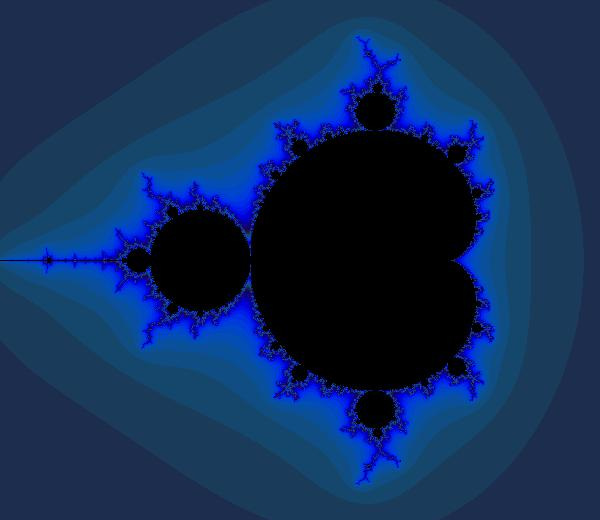

In [18]:
DisplayFractal(ns.eval())

In [19]:
# Partial Differential Equations

In [20]:
def DisplayArray(a, fmt='jpeg', rng=[0,1]):
  """Display an array as a picture."""
  a = (a - rng[0])/float(rng[1] - rng[0])*255
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f, fmt)
  clear_output(wait = True)
  display(Image(data=f.getvalue()))

In [21]:
sess = tf.InteractiveSession.close
sess = tf.InteractiveSession()

c:\dev\workbench\ve_test\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [22]:
def make_kernel(a):
  """Transform a 2D array into a convolution kernel"""
  a = np.asarray(a)
  a = a.reshape(list(a.shape) + [1,1])
  return tf.constant(a, dtype=1)

def simple_conv(x, k):
  """A simplified 2D convolution operation"""
  x = tf.expand_dims(tf.expand_dims(x, 0), -1)
  y = tf.nn.depthwise_conv2d(x, k, [1, 1, 1, 1], padding='SAME')
  return y[0, :, :, 0]

def laplace(x):
  """Compute the 2D laplacian of an array"""
  laplace_k = make_kernel([[0.5, 1.0, 0.5],
                           [1.0, -6., 1.0],
                           [0.5, 1.0, 0.5]])
  return simple_conv(x, laplace_k)

In [23]:
N = 500

In [28]:
# Initial Conditions -- some rain drops hit a pond

# Set everything to zero
u_init = np.zeros([N, N], dtype=np.float32)
ut_init = np.zeros([N, N], dtype=np.float32)

# Some rain drops hit a pond at random points
for n in range(40):
  a,b = np.random.randint(0, N, 2)
  u_init[a,b] = np.random.uniform()

DisplayArray(u_init, rng=[-0.1, 0.1])

NameError: name 'clear_output' is not defined

In [29]:
# Parameters:
# eps -- time resolution
# damping -- wave damping
eps = tf.placeholder(tf.float32, shape=())
damping = tf.placeholder(tf.float32, shape=())

# Create variables for simulation state
U  = tf.Variable(u_init)
Ut = tf.Variable(ut_init)

# Discretized PDE update rules
U_ = U + eps * Ut
Ut_ = Ut + eps * (laplace(U) - damping * Ut)

# Operation to update the state
step = tf.group(
  U.assign(U_),
  Ut.assign(Ut_))

In [30]:
# Initialize state to initial conditions
tf.global_variables_initializer().run()

# Run 1000 steps of PDE
for i in range(1000):
  # Step simulation
  step.run({eps: 0.03, damping: 0.04})
  DisplayArray(U.eval(), rng=[-0.1, 0.1])

NameError: name 'clear_output' is not defined

In [31]:
import tensorflow

In [32]:
import tensorboard